<a href="https://colab.research.google.com/github/nikxianer/NLP_python_course/blob/main/L1_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification

Let's see how to use logistic regression in python to solve classification problems.

For the example, we will use the dataset built into sklearn to solve the binary classification problem - load_breast_cancer.

The dataset contains numerical attributes of women (research results, biological characteristics) and the target variable (1 or 0) shows whether the patient has breast cancer or not.

### Our goals for today:

*  Train a logistic regression on the dataset presented.
*  Evaluate the quality of the resulting model and compare it with the nearest neighbour method.

## Part 1. Loading the data and training the model.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target

X.shape, y.shape

Let's look at the data.

In [ ]:
X.head()

In [ ]:
y[:10]

The *fractal dimension error* trait is not needed in this problem.

Let's remove it (and find out how to do it).

In [ ]:
X.drop('fractal dimension error', axis=1, inplace=True)

Let's check whether the sample is balanced.

In [ ]:
len(y[y==0]), len(y[y==1])

There is no balance of classes, but the skewness is not as strong either.

To solve this problem we will use **linear classification model - logistic regression**.

To begin with, split the data into train and test (test being 20% of all data).

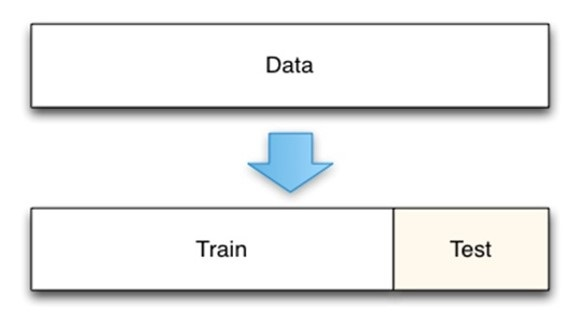

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

For linear models, feature scaling is very important. Therefore we scale the features using StandardScaler, training the method on training data and applying it to both the train and the test.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Train a logistic regression on train and make a prediction on new data for it (test).

In [ ]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [ ]:
pred_test = model.predict(Xtest)

Let's look at the model predictions and estimate the proportion of correct answers.

In [ ]:
pred_test[:5]

In [ ]:
accuracy_score(ytest, pred_test)

We've got a model of excellent quality! But we remember the imbalance of the classes, so we need to calculate other metrics later on.

Let's look at the model weights.

In [ ]:
model.coef_, model.intercept_

In [ ]:
import pandas as pd

coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())

coef_table.sort_values(by='Coefs')

If the weight of a feature is positive, then the feature contributes positively to the response, i.e. the higher the value of the feature, the more it contributes to a positive object class and vice versa.

## Part 2. Probabilities.
We can also look at the probabilities predicted by logistic regression.

In [ ]:
probs = model.predict_proba(Xtest)

probs[:5]

For each object, the model outputs two probabilities: the first number is the probability of class 0, the second is the probability of class 1 (you can check that the sum of the probabilities is 1).

## K-nearest neighbors algorithm

There is another simple method for solving classification problems - the nearest neighbour method.

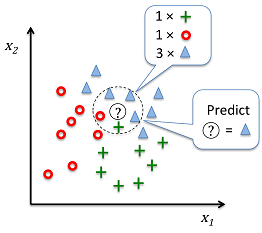

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()

In [ ]:
model3.fit(Xtrain, ytrain)

pred_test3 = model3.predict(Xtest)

accuracy_score(ytest, pred_test3)

## Error matrix analysis and ROC-AUC.

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [ ]:
confusion_matrix(ytest, pred_test)

In [ ]:
score = roc_auc_score(ytest, probs[:,1])
score

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(ytest, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % score)